In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df =  pd.read_csv('/content/climate_change_impact_on_agriculture_2024.csv')
df.head(10)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72
5,2019,USA,Midwest,Coffee,17.19,975.13,10.73,2.180,5,52.45,26.06,71.56,97.32,Water Management,353.16
6,1997,Argentina,Northeast,Fruits,23.46,1816.41,27.70,1.611,2,20.22,0.56,28.72,79.09,Organic Farming,480.61
7,2021,Australia,New South Wales,Rice,25.63,786.17,7.77,3.270,4,66.53,13.44,40.50,63.16,Drought-resistant Crops,1367.97
8,2012,India,Punjab,Wheat,32.08,1233.10,6.10,2.990,1,45.87,10.09,32.54,42.31,Water Management,761.89
9,2018,Nigeria,North West,Barley,21.23,475.32,25.74,0.765,1,25.74,44.38,72.92,84.21,No Adaptation,167.21


In [ ]:
crop_types = df['Crop_Type'].unique()
regions = df['Region'].unique()
years = sorted(df['Year'].unique())


<ipython-input-46-5d6ddab9017b>:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


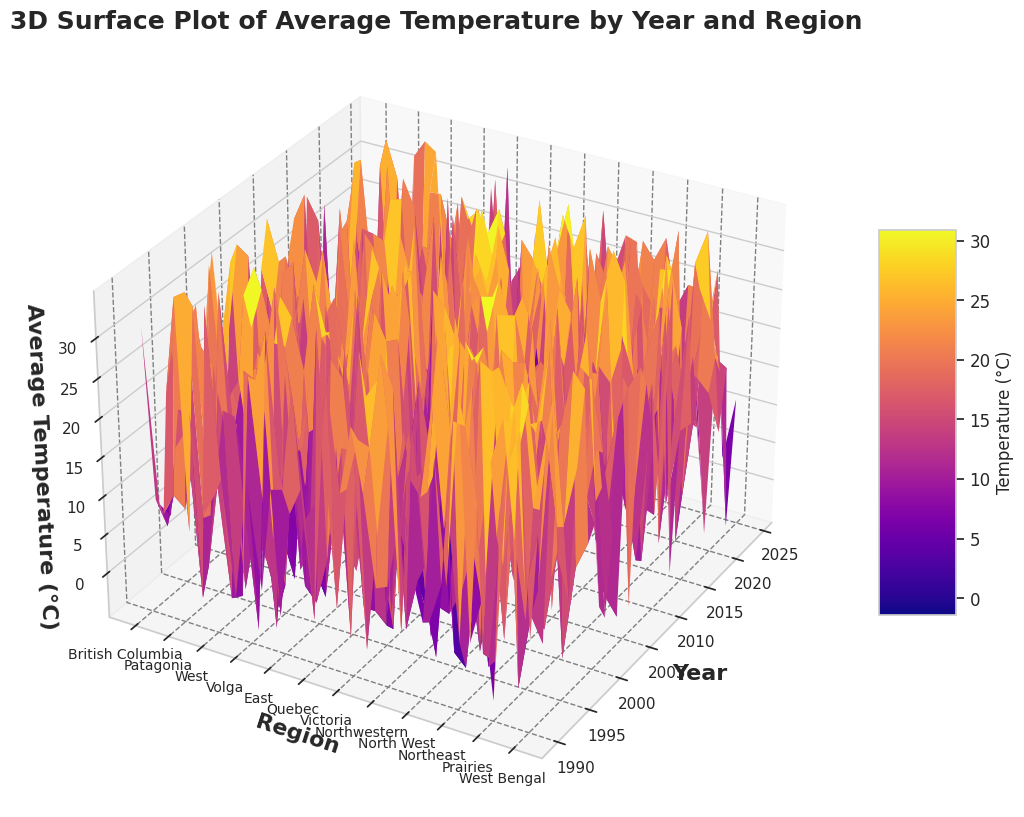

In [ ]:
# Create a grid for the surface plot
X, Y = np.meshgrid(years, range(len(regions)))  # Create a grid of years and region indices

# Initialize Z with NaNs to handle missing data
Z = np.full(X.shape, np.nan)

# Fill Z with average temperatures
for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]
    # Check if region_data is not empty and has the same length as years
    if not region_data.empty:
        # Ensure that the years match, filling only where there's valid data
        for year in years:
            if year in region_data['Year'].values:
                Z[i, np.where(years == year)[0][0]] = region_data.loc[region_data['Year'] == year, 'Average_Temperature_C'].values[0]

# Create a 3D surface plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with a different color map for clarity
surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none')

# Customize the axes with clearer labels
ax.set_xlabel('Year', fontsize=16, fontweight='bold')
ax.set_ylabel('Region', fontsize=16, fontweight='bold')
ax.set_zlabel('Average Temperature (°C)', fontsize=16, fontweight='bold')
ax.set_title('3D Surface Plot of Average Temperature by Year and Region', fontsize=18, fontweight='bold')

# Set y-ticks to be the region names but spaced apart
yticks = np.arange(0, len(regions), max(1, len(regions) // 10))  # Adjust tick spacing
ax.set_yticks(yticks)
ax.set_yticklabels(regions[yticks], fontsize=10)  # Smaller font size for readability

# Adjust view angle for better visibility
ax.view_init(elev=30, azim=210)  # Elevation and angle

# Add grid lines for better interpretation
ax.xaxis._axinfo['grid'].update(color='gray', linestyle='--', alpha=0.5)
ax.yaxis._axinfo['grid'].update(color='gray', linestyle='--', alpha=0.5)

# Add a color bar to show temperature scale
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Temperature (°C)')
cbar.ax.tick_params(labelsize=12)  # Font size for color bar ticks

# Show the plot
plt.tight_layout()
plt.savefig('g1.png')

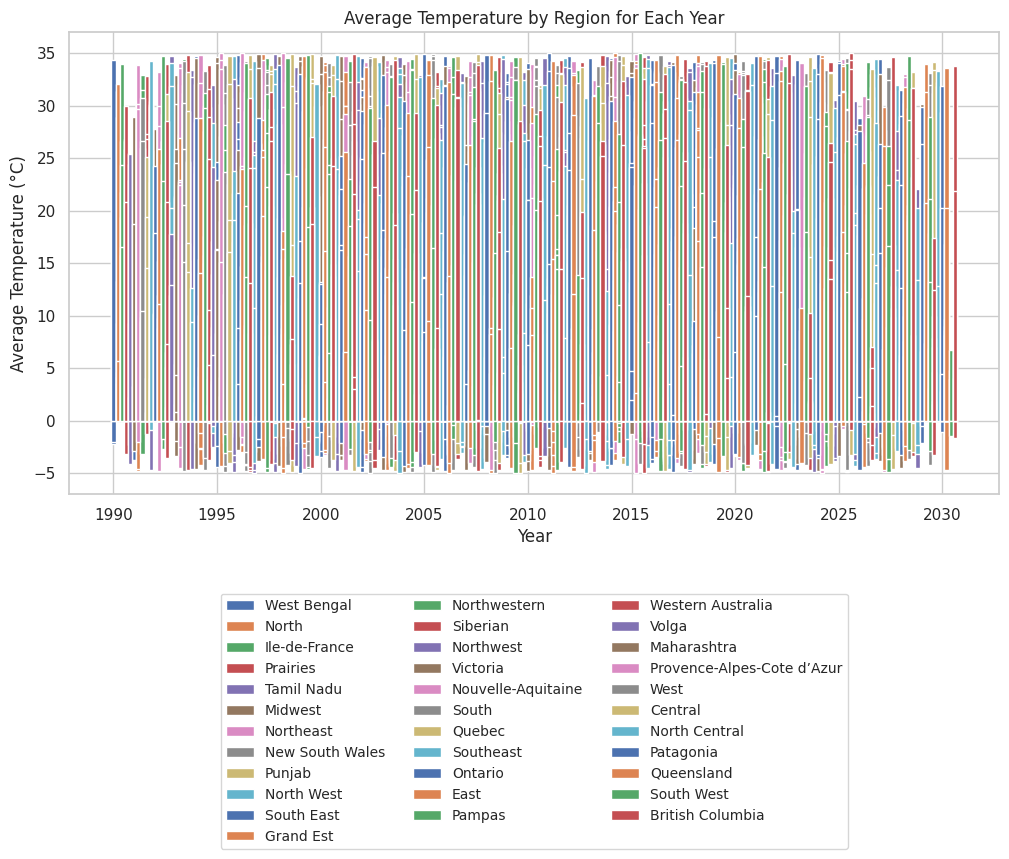

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]
    ax.bar(region_data['Year'] + i * 0.2, region_data['Average_Temperature_C'], width=0.2, label=region)
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature (°C)')
ax.set_title('Average Temperature by Region for Each Year')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize='small')
plt.savefig('g2.png')

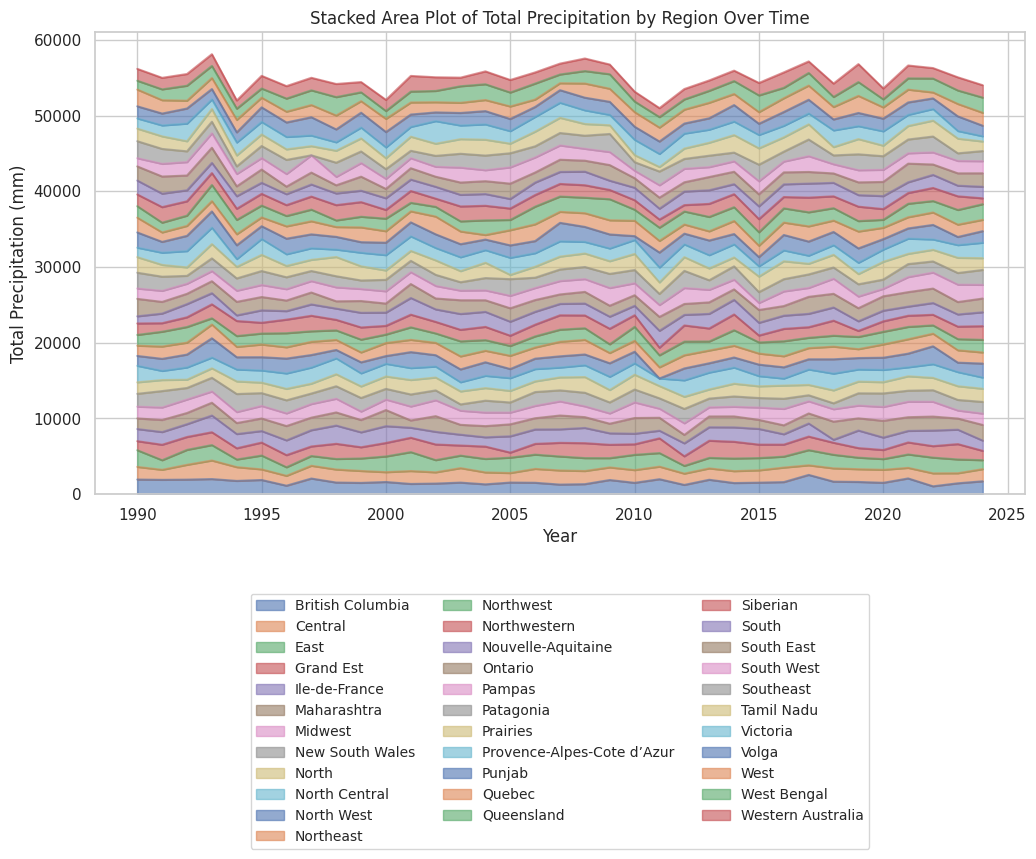

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
stack_data = df.pivot_table(index='Year', columns='Region', values='Total_Precipitation_mm', aggfunc='mean')
stack_data.plot.area(ax=ax, alpha=0.6)
ax.set_xlabel('Year')
ax.set_ylabel('Total Precipitation (mm)')
plt.title('Stacked Area Plot of Total Precipitation by Region Over Time')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize='small')
plt.savefig('g3.png')

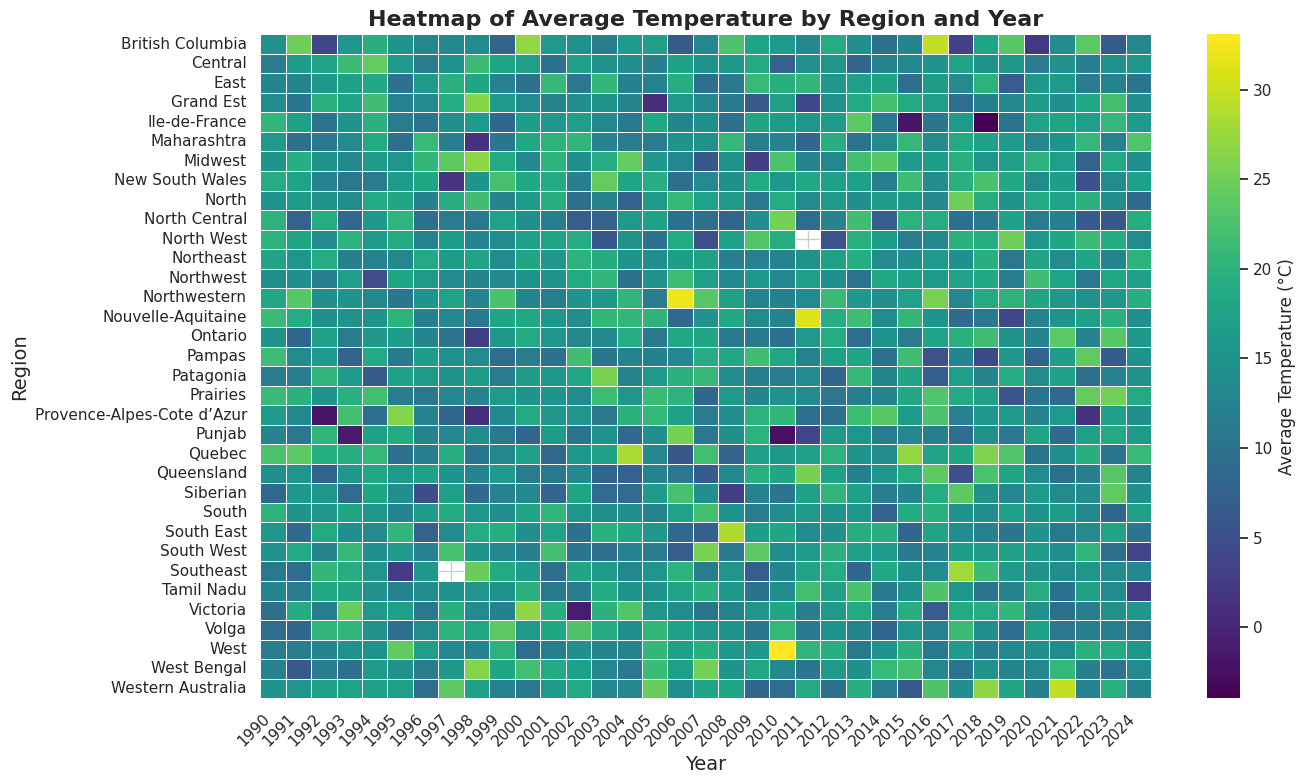

In [ ]:
pivot_data = df.pivot_table(index='Region', columns='Year', values='Average_Temperature_C', aggfunc='mean')
plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_data,
    cmap='viridis',
    annot=False,  # Set to True if you want to display values
    fmt=".1f",  # Format for annotations if enabled
    linewidths=0.5,  # Add slight spacing between cells
    linecolor='white',  # Color of the cell borders
    cbar_kws={'label': 'Average Temperature (°C)', 'orientation': 'vertical'}  # Customize color bar
)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.title('Heatmap of Average Temperature by Region and Year', fontsize=16, weight='bold')

# Rotate tick labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.savefig('g4.png')

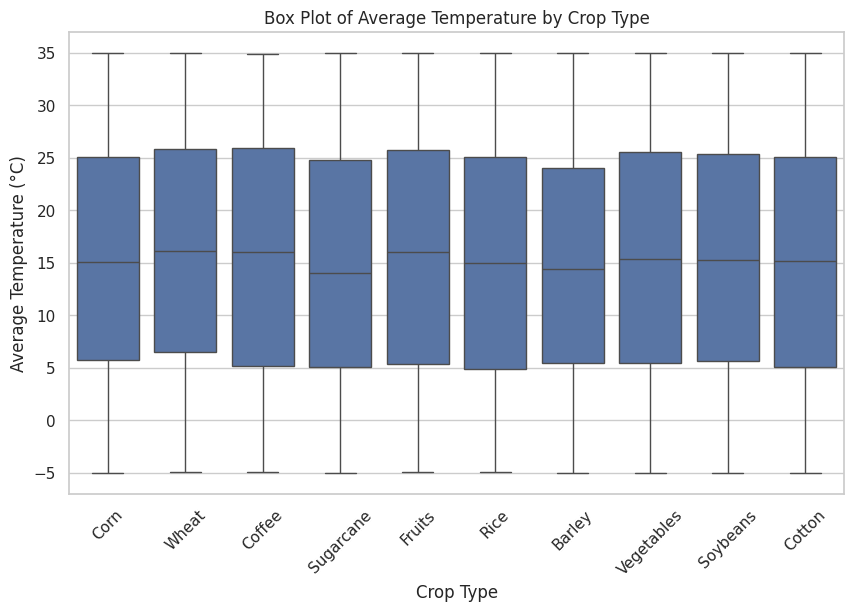

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Crop_Type', y='Average_Temperature_C', data=df)
plt.xlabel('Crop Type')
plt.ylabel('Average Temperature (°C)')
plt.title('Box Plot of Average Temperature by Crop Type')
plt.xticks(rotation=45)
plt.savefig('g5.png')

## Q2

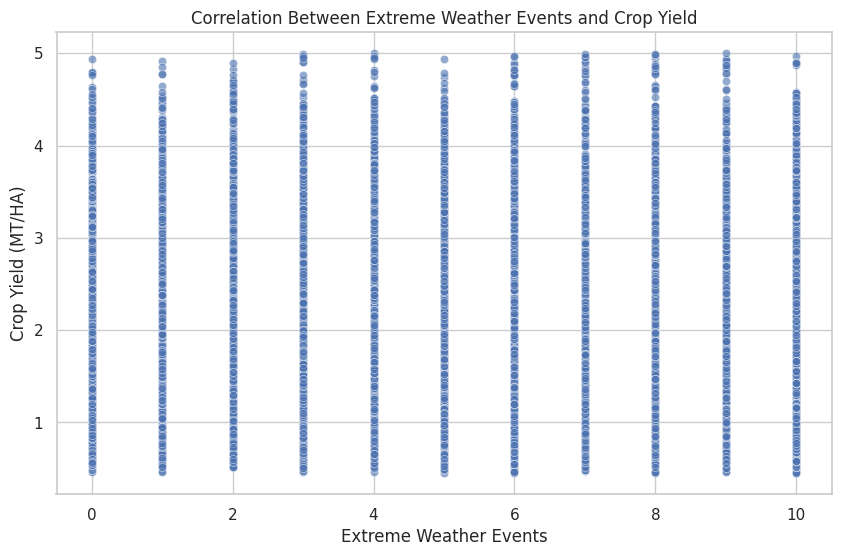

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Extreme_Weather_Events', y='Crop_Yield_MT_per_HA', alpha=0.6)
plt.title('Correlation Between Extreme Weather Events and Crop Yield')
plt.xlabel('Extreme Weather Events')
plt.ylabel('Crop Yield (MT/HA)')
plt.savefig('g6.png')

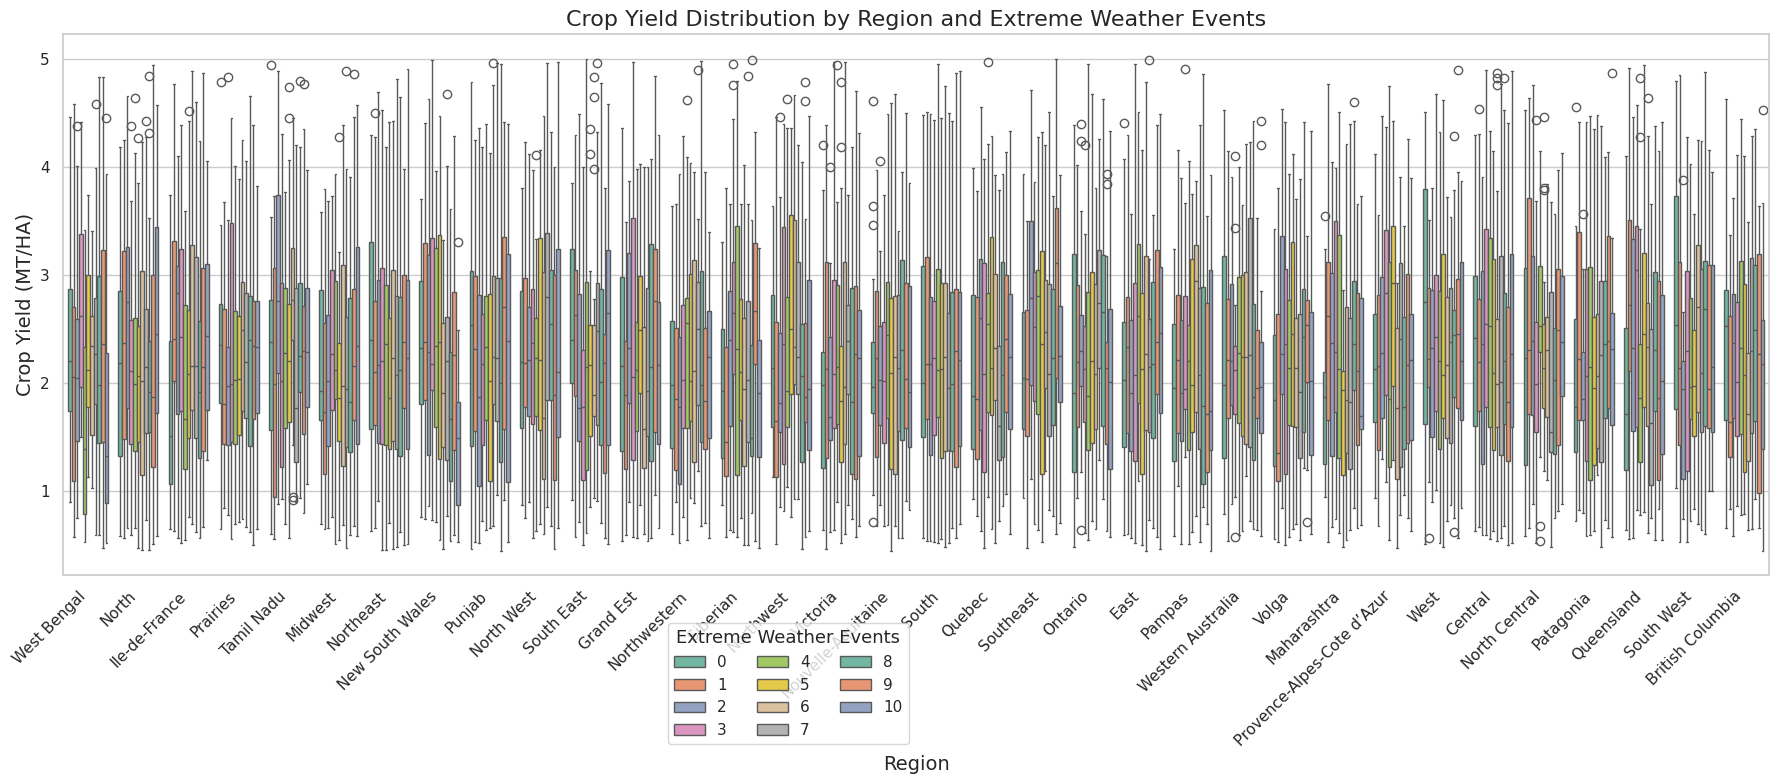

In [ ]:
plt.figure(figsize=(18, 8))  # Further increase in size for better clarity
sns.boxplot(data=df, x='Region', y='Crop_Yield_MT_per_HA', hue='Extreme_Weather_Events', palette="Set2")
plt.title('Crop Yield Distribution by Region and Extreme Weather Events', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Crop Yield (MT/HA)', fontsize=14)
plt.legend(loc='center right', bbox_to_anchor=(0.5, -0.2), ncol=3, title='Extreme Weather Events', title_fontsize=13, fontsize=11)
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()  # Adjust layout to reduce overlap
plt.savefig('g7.png')


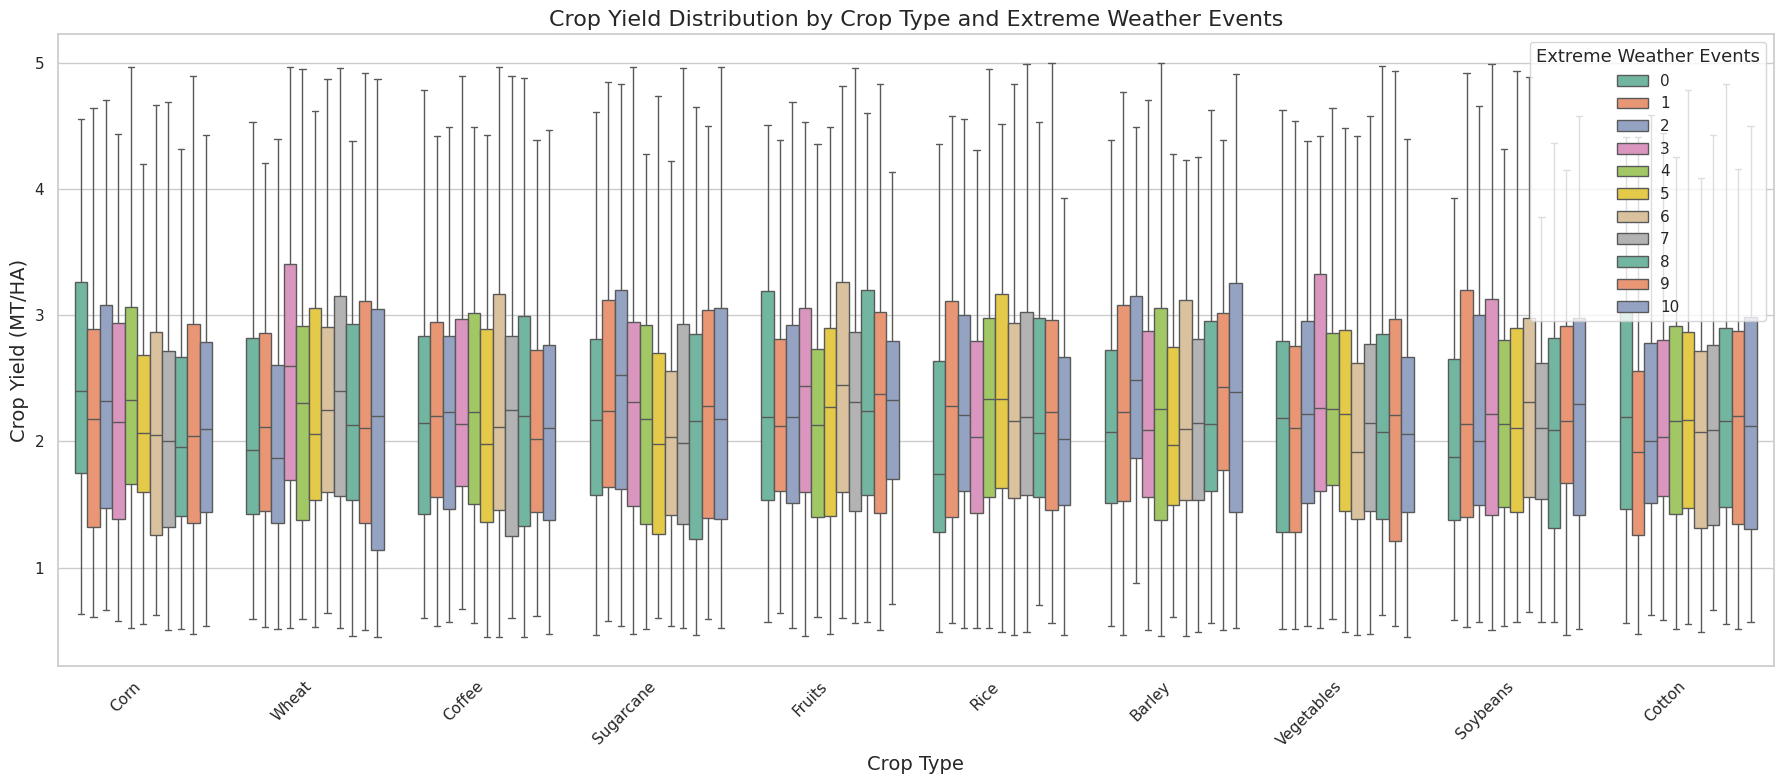

In [ ]:
plt.figure(figsize=(18, 8))  # Increased size for better clarity
sns.boxplot(data=df, x='Crop_Type', y='Crop_Yield_MT_per_HA', hue='Extreme_Weather_Events', palette="Set2", showfliers=False)
plt.title('Crop Yield Distribution by Crop Type and Extreme Weather Events', fontsize=16)
plt.xlabel('Crop Type', fontsize=14)
plt.ylabel('Crop Yield (MT/HA)', fontsize=14)
plt.legend(title='Extreme Weather Events', title_fontsize=13, fontsize=11)
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()  # Adjust layout to reduce overlap
plt.savefig('g8.png')


In [ ]:

# Step 2: Predictive Model for Crop Yield based on Temperature and Precipitation
# Define features and target variable
X = df[['Average_Temperature_C', 'Total_Precipitation_mm']]
y = df['Crop_Yield_MT_per_HA']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict crop yields for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2  # Display MSE and R2 for model evaluation


(0.9955957020700035, 0.05672933154362858)

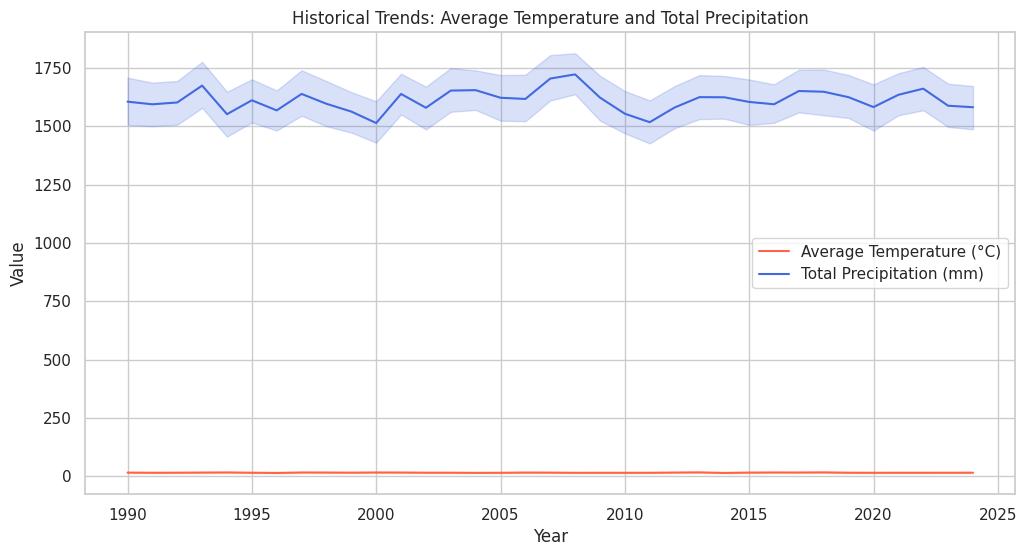

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Average_Temperature_C', label='Average Temperature (°C)', color='tomato')
sns.lineplot(data=df, x='Year', y='Total_Precipitation_mm', label='Total Precipitation (mm)', color='royalblue')
plt.title('Historical Trends: Average Temperature and Total Precipitation')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.savefig('g9.png')

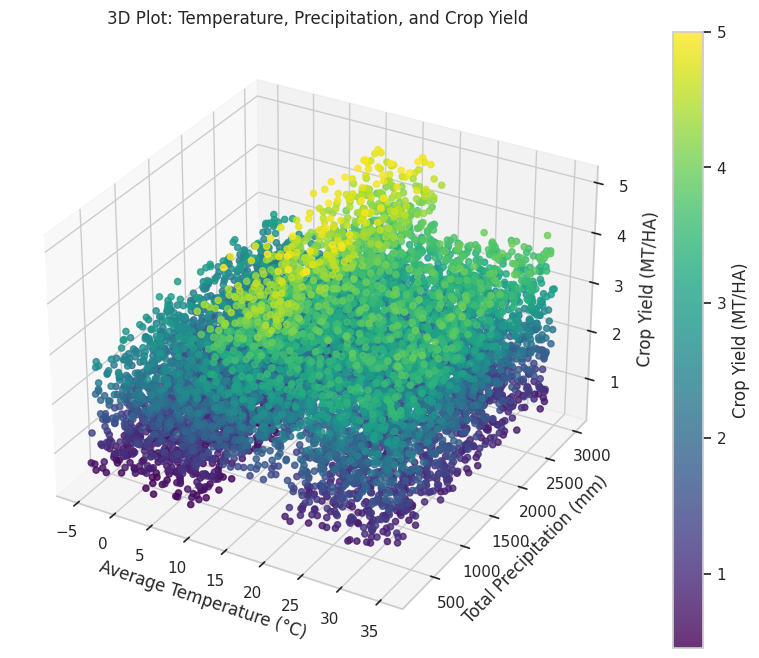

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Average_Temperature_C'], df['Total_Precipitation_mm'], df['Crop_Yield_MT_per_HA'],
                c=df['Crop_Yield_MT_per_HA'], cmap='viridis', alpha=0.8)

ax.set_xlabel('Average Temperature (°C)')
ax.set_ylabel('Total Precipitation (mm)')
ax.set_zlabel('Crop Yield (MT/HA)')
ax.set_title('3D Plot: Temperature, Precipitation, and Crop Yield')
fig.colorbar(sc, ax=ax, label='Crop Yield (MT/HA)')
plt.savefig('g10.png')